## Step 1: Environment Setup
we use
- `yfinance`: To fetch historical stock data from Yahoo Finance.
- `pandas`: For data manipulation and analysis.
- `matplotlib` and `seaborn`: For data visualization.
- `plotly`: For interactive visualizations (optional).
- `ta`: To calculate technical analysis indicators like RSI, MACD, SMA, etc.

In [22]:
pip install yfinance ta

In [23]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import ta
import yfinance as yf
import os
import time

## Step 2: Load Stock Data

We'll use the `yfinance` library to download historical stock data.  
For this project, we will analyze Infosys (Ticker: INFY.NS) from 2020 to 2024.

Yahoo Finance provides Open, High, Low, Close, Adjusted Close, and Volume data.


In [24]:
df = yf.download('INFY.NS', start='2020-04-01', end='2021-03-31')
df.to_csv('INFY.csv')

df.head(5)

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFY.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,,


In [25]:
df.columns

MultiIndex([('Adj Close', 'INFY.NS'),
            (    'Close', 'INFY.NS'),
            (     'High', 'INFY.NS'),
            (      'Low', 'INFY.NS'),
            (     'Open', 'INFY.NS'),
            (   'Volume', 'INFY.NS')],
           names=['Price', 'Ticker'])

In [26]:
df.index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

## Step 3: Visualize the Closing Price Trend

Plotting the closing price over time helps us visually understand stock performance.

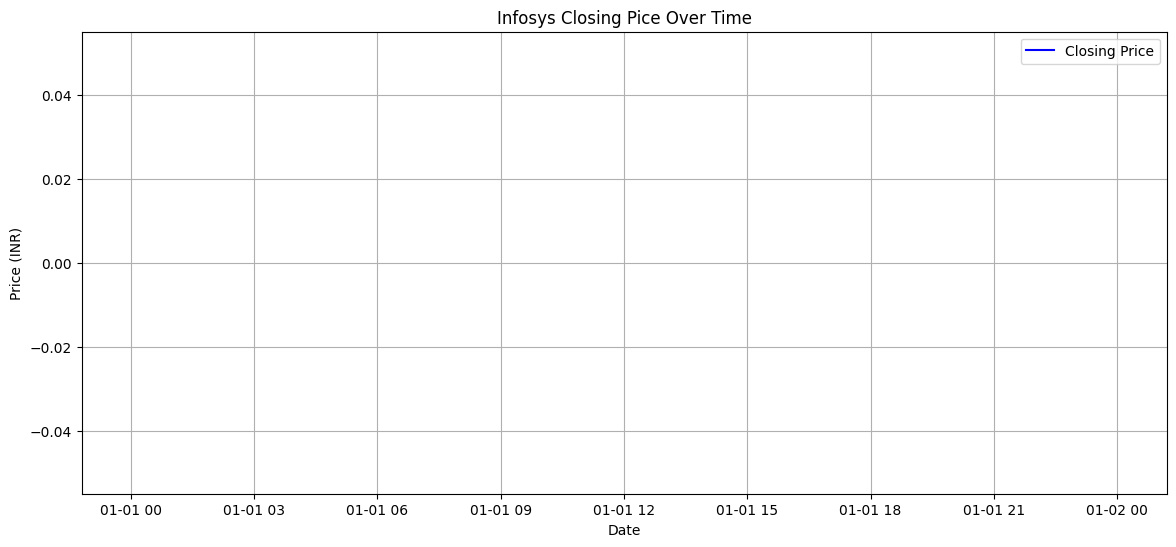

In [27]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Infosys Closing Pice Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Add Technical Indicators

### Step 4A: Simple Moving Averages (SMA)

- SMA smooths out price data to highlight trends.  
- We'll calculate 50-day and 200-day SMAs.
- Traders use it to identify trend direction.
- If the 50-day SMA crosses above the 200-day SMA, it’s called a golden cross (bullish signal).
- If it crosses below, it's a death cross (bearish signal).



In [28]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,
Date,,,,,,,,


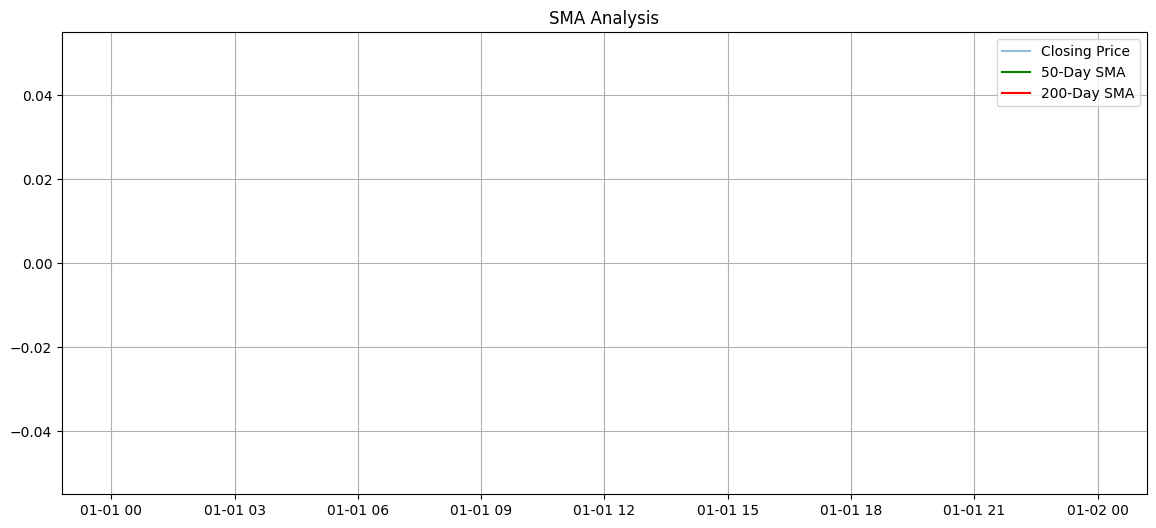

In [29]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price', alpha=0.5)
plt.plot(df['SMA_50'], label='50-Day SMA', color='green')
plt.plot(df['SMA_200'], label='200-Day SMA', color='red')
plt.legend()
plt.title('SMA Analysis')
plt.grid(True)
plt.show()

### Step 4B: Relative Strength Index (RSI)

RSI is a momentum indicator that shows whether a stock is **overbought or oversold**.

- RSI above 70 = Overbought (price might fall)
- RSI below 30 = Oversold (price might rise)

We use a 14-day window to calculate RSI.

In [30]:
from ta.momentum import RSIIndicator

rsi = RSIIndicator(close=df['Close'].squeeze(), window=14)
df['rsi'] = rsi.rsi()
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,
Date,,,,,,,,,


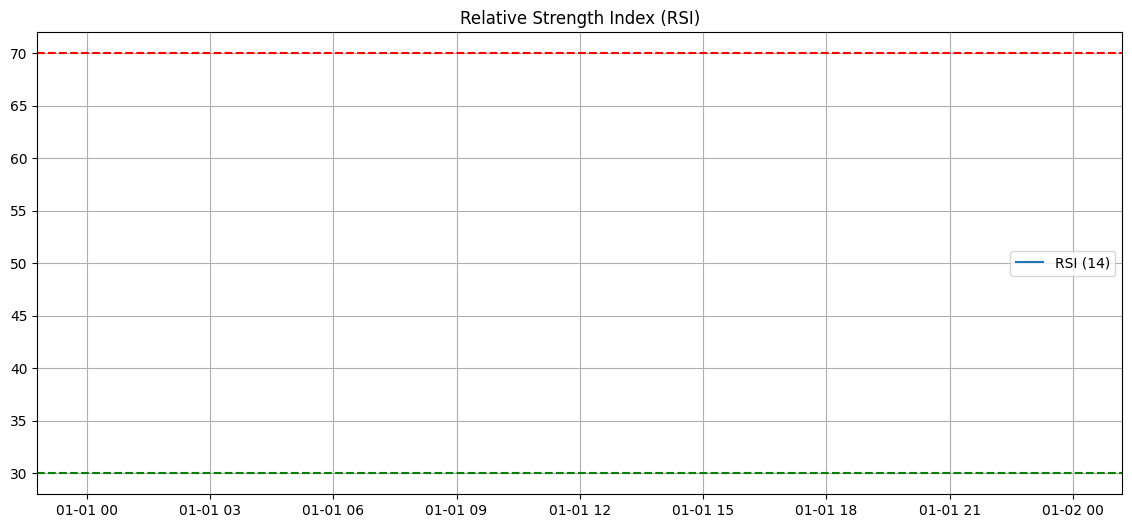

In [31]:
plt.figure(figsize=(14,6))
plt.plot(df['rsi'], label='RSI (14)')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()

### Step 4C: Moving Average Convergence Divergence (MACD)

MACD is a trend-following momentum indicator based on the difference between two EMAs (Exponential Moving Averages).

It helps us spot **buy** or **sell** signals:
- MACD line crossing **above** Signal line → Buy
- MACD line crossing **below** Signal line → Sell

In [32]:
from ta.trend import MACD

macd = MACD(close=df['Close'].squeeze())
df['macd'] = macd.macd()
df['signal'] = macd.macd_signal()
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,
Date,,,,,,,,,,,


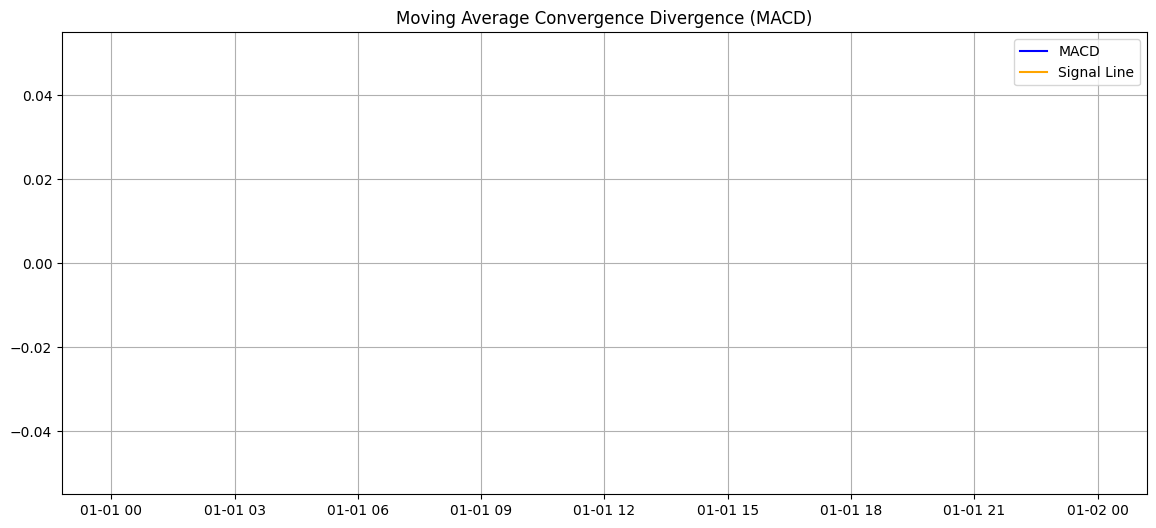

In [33]:
plt.figure(figsize=(14,6))
plt.plot(df['macd'], label='MACD', color='blue')
plt.plot(df['signal'], label='Signal Line', color='orange')
plt.legend()
plt.title('Moving Average Convergence Divergence (MACD)')
plt.grid(True)
plt.show()

## Step 5: Calculating Daily Returns

We calculate daily returns to understand how much the stock price changes from one day to the next, expressed as a percentage. This helps us measure short-term performance.

We use the `pct_change()` function on the 'Close' price, which gives us the percentage change between the current day and the previous day. We also fill the first row with 0, as it will be NaN.

**Formula**:
We calculate **Daily Return** by subtracting yesterday's closing price from today's closing price, then dividing the result by yesterday's closing price.

In [34]:
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].fillna(0, inplace=True)
df.head()

<ipython-input-34-57b1c040c831>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily Return'].fillna(0, inplace=True)


Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,
Date,,,,,,,,,,,,


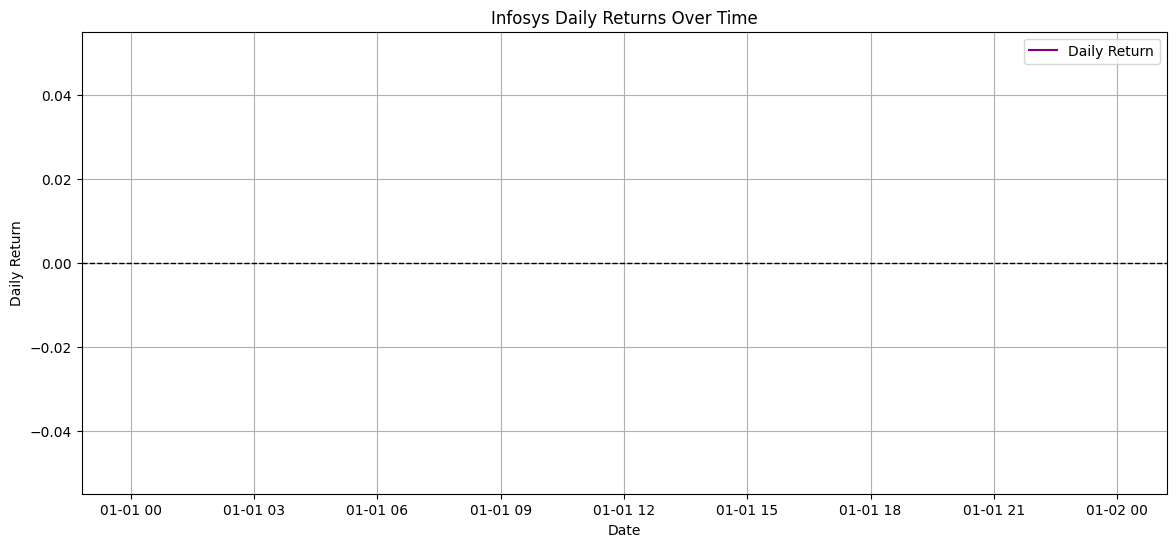

In [35]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Daily Return'], label= 'Daily Return', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Infosys Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

## Step 6: Calculating Cumulative Returns

Cumulative return tells us the total return we would get if we had invested at the beginning and held the stock until now.

We calculate it by multiplying each day’s return cumulatively:

- Cumulative Return = (1 + Return on Day 1) × (1 + Return on Day 2) × ... × (1 + Return on Day t)

For example, if the return is +1% on Day 1 and +2% on Day 2:

- (1 + 0.01) × (1 + 0.02) = 1.01 × 1.02 = 1.0302
So the Cumulative Return = 3.02%

We use `cumprod()` to multiply returns in sequence.

In [36]:
df['Cumulative Return'] =   (1 + df['Daily Return']).cumprod()
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return,Cumulative Return
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,,
Date,,,,,,,,,,,,,


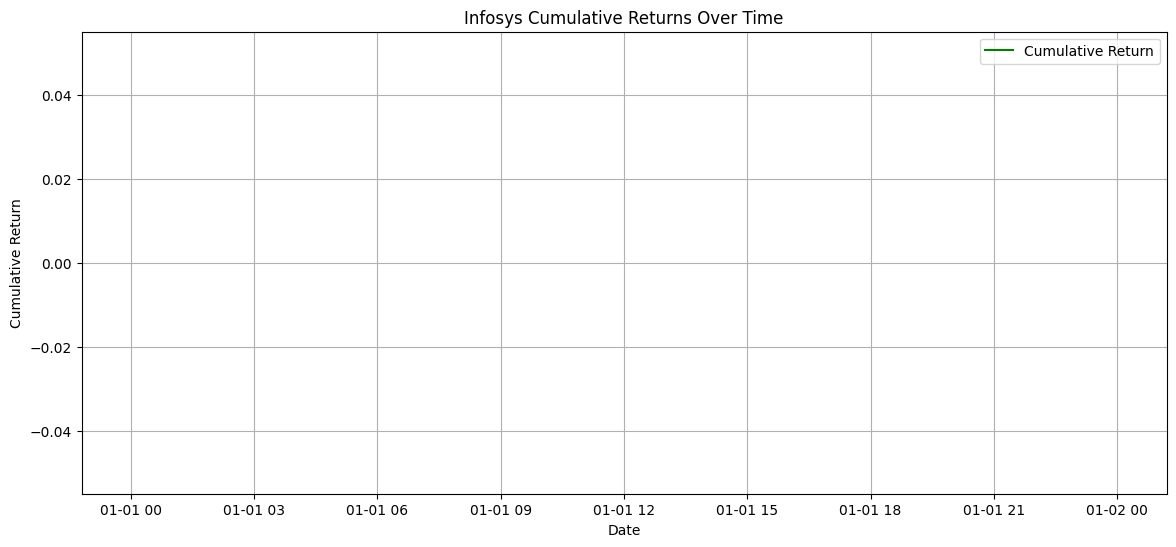

In [37]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Cumulative Return'], label='Cumulative Return', color='green')
plt.title('Infosys Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

## Step 7: Volatility Analysis

**Volatility** shows how much the stock price fluctuates over a period of time.  
We calculate this using the **rolling standard deviation** of daily returns.  

- A **higher volatility** means the stock is more risky or unstable.
- A **lower volatility** means the stock is stable.

By plotting volatility, we can visually spot high-risk or low-risk time periods.

We typically use a 20-day window to smooth out daily noise and detect meaningful trends.

In [38]:
df[('Volatility', '')] = df[('Daily Return', '')].rolling(window=20).std()
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return,Cumulative Return,Volatility
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,,,
Date,,,,,,,,,,,,,,


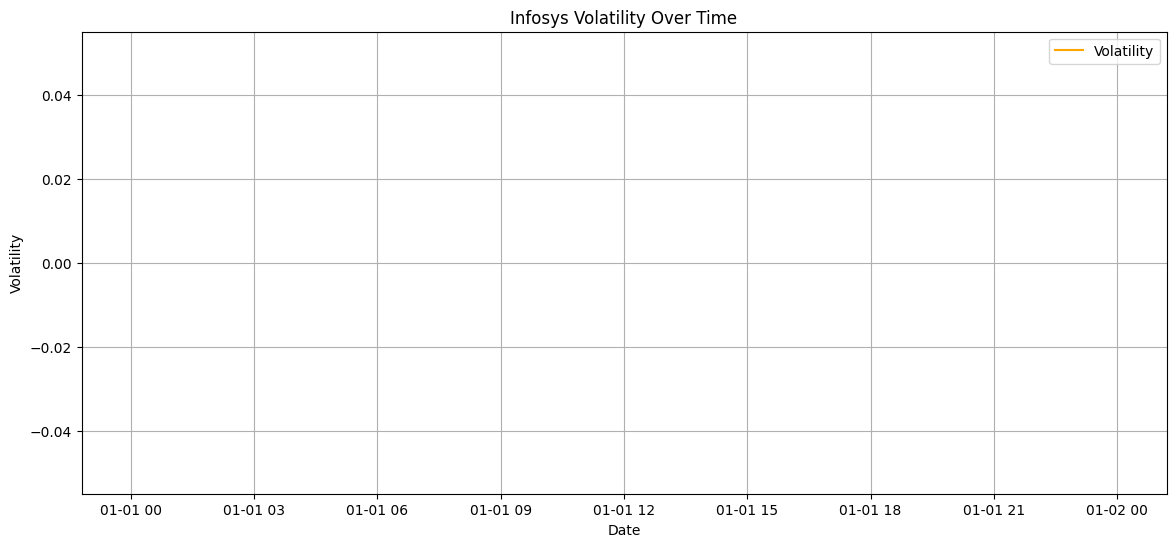

In [39]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df[('Volatility', '')], label='Volatility', color='orange')
plt.title('Infosys Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

## Step 8: Bollinger Bands

**Bollinger Bands** are a technical analysis tool used to measure **price volatility**.  
They consist of:

- **Middle Band**: The 50-day Simple Moving Average (SMA)
- **Upper Band**: SMA + 2 × standard deviation
- **Lower Band**: SMA − 2 × standard deviation

These bands expand and contract with price volatility:
- When the price touches the **upper band**, it may be **overbought**
- When it touches the **lower band**, it may be **oversold**

Bollinger Bands help in identifying reversal points and breakout conditions.
We also fill the area between the bands to visualize volatility zones.

In [40]:
rolling_std = df['Close', 'INFY.NS'].rolling(window=50).std()
df[('Upper Band', '')] = df[('SMA_50', '')] + (2 * rolling_std)
df[('Lower Band', '')] = df[('SMA_50', '')] - (2 * rolling_std)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,rsi,macd,signal,Daily Return,Cumulative Return,Volatility,Upper Band,Lower Band
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,,,,,,,,,,
Date,,,,,,,,,,,,,,,,


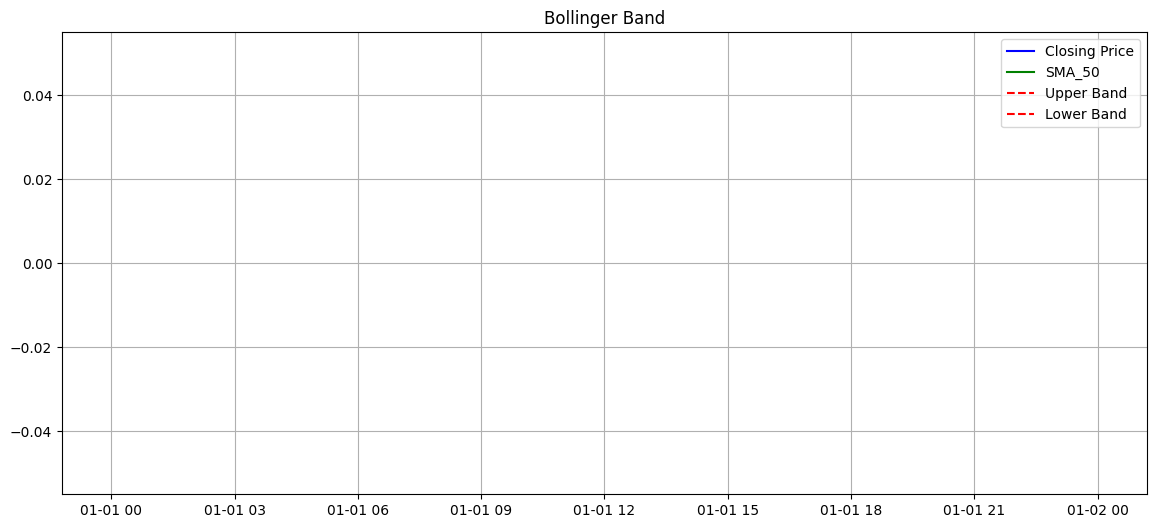

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df[('Close', 'INFY.NS')], label='Closing Price', color='blue')
plt.plot(df.index, df[('SMA_50', '')], label='SMA_50', color='green')
plt.plot(df.index, df[('Upper Band', '')], label='Upper Band', linestyle='--', color='red')
plt.plot(df.index, df[('Lower Band', '')], label='Lower Band', linestyle='--', color='red')
plt.fill_between(df.index, df[('Lower Band', '')], df[('Upper Band', '')], color='grey', alpha=0.1)
plt.title('Bollinger Band')
plt.legend()
plt.grid(True)
plt.show()

## step 9: Volume & Price Movement (Dual Axis Plot)
To analyze the strength of a stock’s movement, it is important to observe both:

- Price movement (how much the stock price is changing)

- Volume (how many shares are being traded)

These two metrics together help identify strong breakouts or reversals. For example:

- A big price jump with high volume can indicate a strong bullish move.
- A price drop with high volume may confirm strong selling pressure.

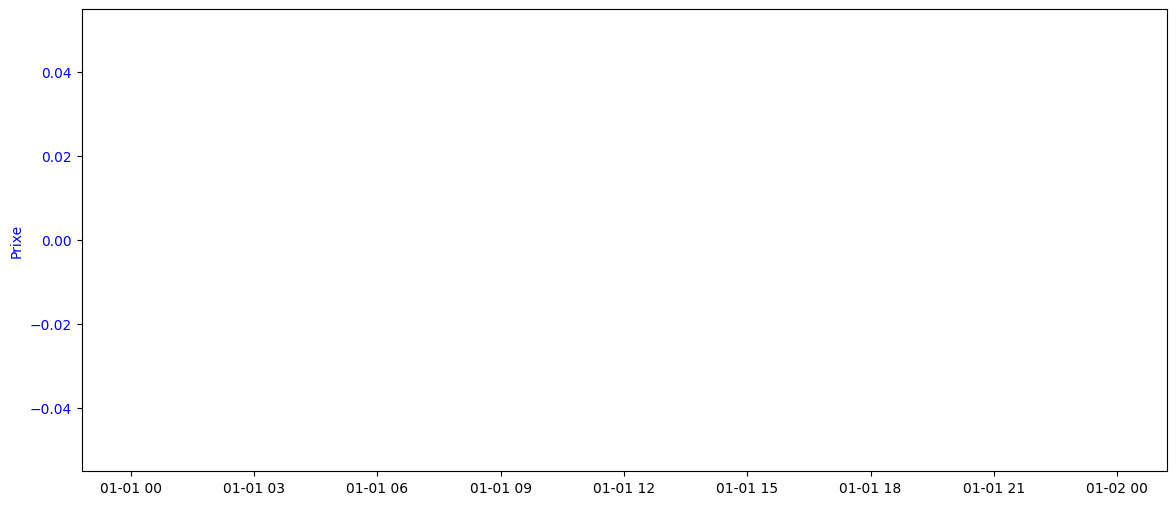

In [42]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Plotting closing price on the primary y-axis
ax1.plot(df.index, df[('Close', 'INFY.NS')], label='Closing Price', color='blue')
ax1.set_ylabel('Prixe', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')